<a href="https://colab.research.google.com/github/hijera/NN_colab_hw/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%B0%D0%B2%D1%82%D0%BE%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B9_%D1%83%D1%81%D0%BB%D0%BE%D0%B2%D0%BD%D0%BE%D0%B9_%D0%B3%D0%B5%D1%82%D0%B5%D1%80%D0%BE%D1%81%D0%BA%D0%B5%D0%BD%D0%B0%D0%B4%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D0%B8_(%D0%92%D0%BB%D0%B0%D1%81%D0%BE%D0%B2_%D0%90%D0%BD%D1%82%D0%BE%D0%BD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание  
1.  Выберите ряд из первого задания.
2.  Постройте его модель GARCH.
3.  Оформите отчёт в Jupyter-ноутбук.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# import itertools
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))
        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)

        plt.tight_layout()
    return
def test_stationarity(timeseries):

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    res_arr={}
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

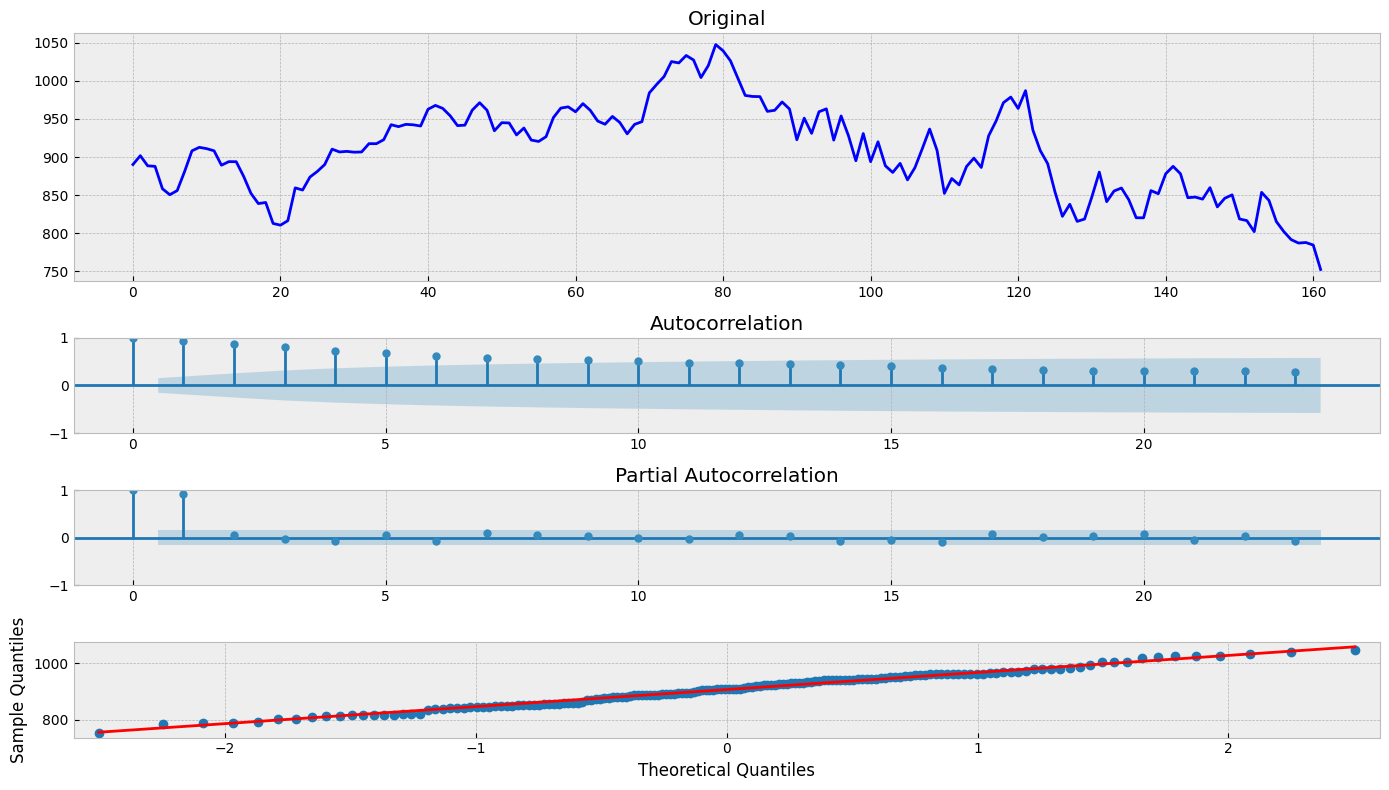

In [ ]:
series = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")['Close']
# series = series.astype('float64')
tsplot(series)

In [ ]:
test_stationarity(series)

Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64

In [ ]:
!pip install update arch

In [ ]:
from arch import arch_model

In [ ]:
series

0      890.19
1      901.80
2      888.51
3      887.78
4      858.43
        ...  
157    791.77
158    787.23
159    787.94
160    784.57
161    752.58
Name: Close, Length: 162, dtype: float64

In [ ]:
series = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv").dropna().values[:, 1]
series = series[1:] - series[:-1]
series = series[12:] - series[:-12]
series

array([-6.939999999999827, 13.219999999999914, -18.329999999999927,
       6.8700000000000045, -5.550000000000068, -4.019999999999982,
       -52.33999999999992, -29.510000000000105, 1.2799999999999727,
       44.79000000000008, -0.06000000000005912, 35.960000000000036,
       2.699999999999932, 9.100000000000136, 39.229999999999905,
       18.789999999999964, 14.13000000000011, -2.4500000000000455,
       27.749999999999886, 13.180000000000177, -5.9500000000000455,
       -37.770000000000095, 22.480000000000018, -19.6099999999999,
       -4.360000000000014, -9.63000000000011, -21.749999999999886,
       25.590000000000032, 4.3599999999999, -2.8600000000000136,
       -9.92999999999995, -23.850000000000023, 0.6700000000000728,
       14.43999999999994, -9.92999999999995, -7.300000000000068,
       -29.949999999999932, 11.209999999999923, 1.2100000000000364,
       -37.56000000000006, 3.909999999999968, -11.879999999999882,
       7.82000000000005, 19.18999999999994, 24.459999999999923,

In [ ]:
series = series.astype(float)

In [ ]:
# Now we can fit the arch model using the best fit arima model parameters
p_ = 2
o_ = 1
q_ = 2

# Using student T distribution usually provides better fit
am = arch_model(series, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -699.919
Distribution:      Standardized Student's t   AIC:                           1415.84
Method:                  Maximum Likelihood   BIC:                           1439.87
                                              No. Observations:                  149
Date:                      Fri, Nov 24 2023   Df Residuals:                      148
Time:                              04:32:59   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0

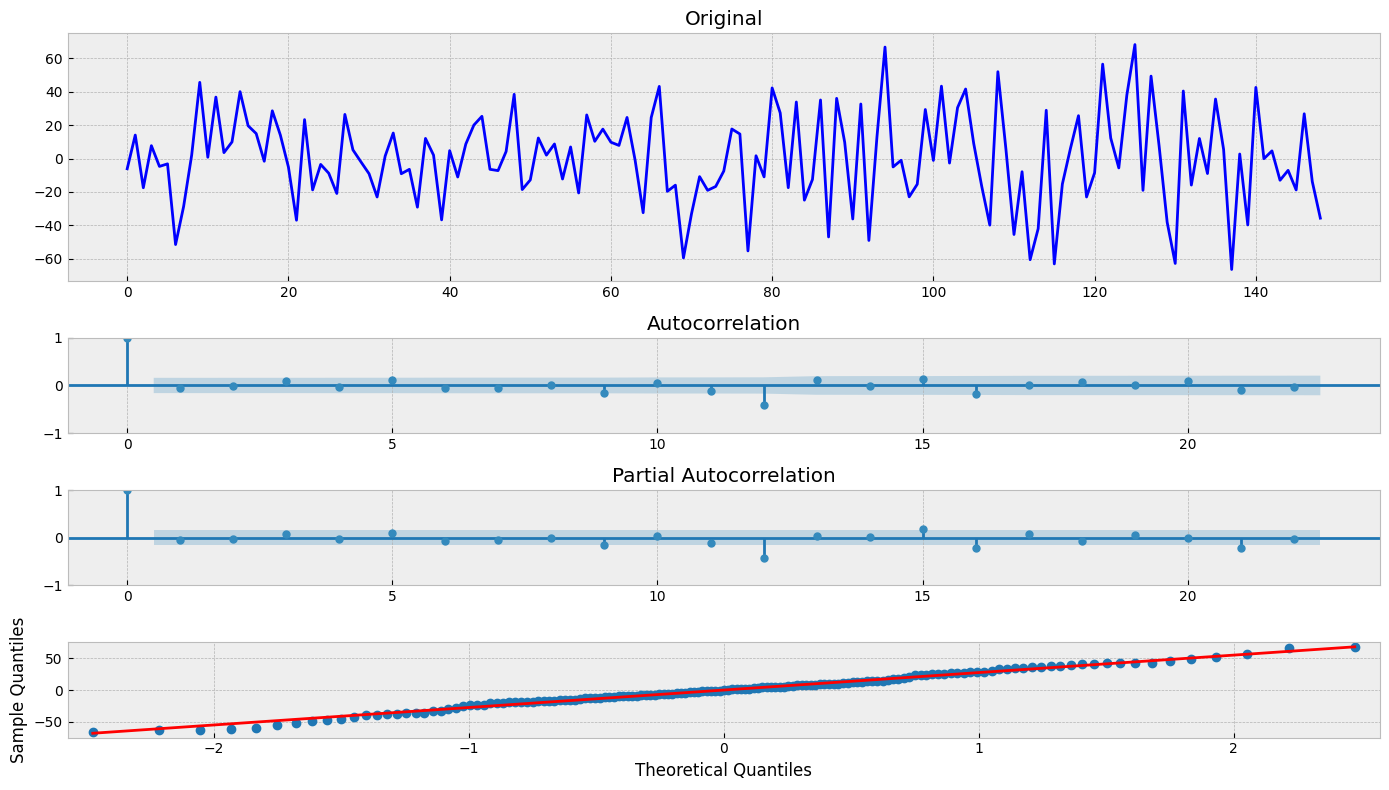

In [ ]:
tsplot(res.resid)


Подберем параметры GARCH

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
def _get_best_garch_model(TS):
    best_aic = np.inf
    best_order = None
    best_mdl = None

    # Иттерируем p, q, и o from 0 to 4
    for p in range(5):
        for o in range(5):
            for q in range(5):
                try:
                    tmp_mdl = arch_model(TS, vol = 'Garch', p = p, o = o, q = q).fit()
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (p, o, q)
                        best_mdl = tmp_mdl
                except:
                    continue

    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
    return best_aic, best_order, best_mdl

In [ ]:
aic, order, mdl = _get_best_garch_model(series)

Iteration:      1,   Func. Count:      5,   Neg. LLF: 728.2228702392533
Iteration:      2,   Func. Count:     11,   Neg. LLF: 721.3921073194035
Iteration:      3,   Func. Count:     15,   Neg. LLF: 721.328118786006
Iteration:      4,   Func. Count:     19,   Neg. LLF: 721.2934006891735
Iteration:      5,   Func. Count:     23,   Neg. LLF: 721.2332187863688
Iteration:      6,   Func. Count:     27,   Neg. LLF: 720.9050100031519
Iteration:      7,   Func. Count:     31,   Neg. LLF: 720.3204989064313
Iteration:      8,   Func. Count:     35,   Neg. LLF: 719.3414367243292
Iteration:      9,   Func. Count:     39,   Neg. LLF: 717.782325602068
Iteration:     10,   Func. Count:     43,   Neg. LLF: 715.4142682467459
Iteration:     11,   Func. Count:     47,   Neg. LLF: 712.353872415234
Iteration:     12,   Func. Count:     51,   Neg. LLF: 709.1927960987849
Iteration:     13,   Func. Count:     55,   Neg. LLF: 706.5318071759048
Iteration:     14,   Func. Count:     59,   Neg. LLF: 705.974244460

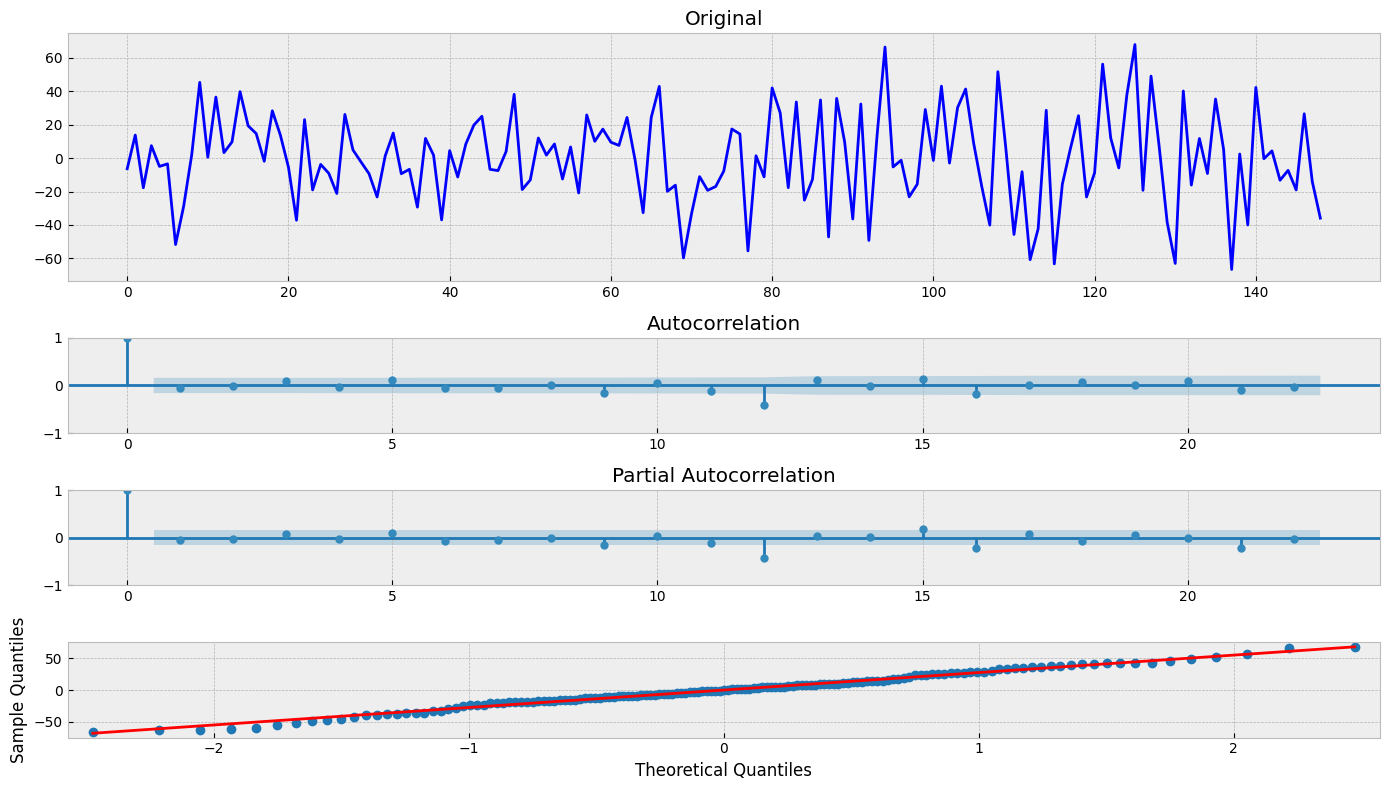

In [ ]:
tsplot(mdl.resid)

In [ ]:
test_stationarity(series)

Test Statistic                  -3.365230
p-value                          0.012203
#Lags Used                      14.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64

In [ ]:
res_model = arch_model(series, p = order[0], o = order[1], q = order[2], dist='StudentsT')
res_model_fit = res_model.fit(update_freq=5)
print(res_model_fit.summary())

Iteration:      5,   Func. Count:     37,   Neg. LLF: 702.1188127493222
Iteration:     10,   Func. Count:     67,   Neg. LLF: 701.7274987647736
Iteration:     15,   Func. Count:     97,   Neg. LLF: 700.8832251792278
Iteration:     20,   Func. Count:    128,   Neg. LLF: 700.8626752964084
Iteration:     25,   Func. Count:    158,   Neg. LLF: 700.738592883872
Iteration:     30,   Func. Count:    208,   Neg. LLF: 700.7075829649909
Optimization terminated successfully    (Exit mode 0)
            Current function value: 700.7075726400917
            Iterations: 32
            Function evaluations: 220
            Gradient evaluations: 32
                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -700.708
Distribution:      

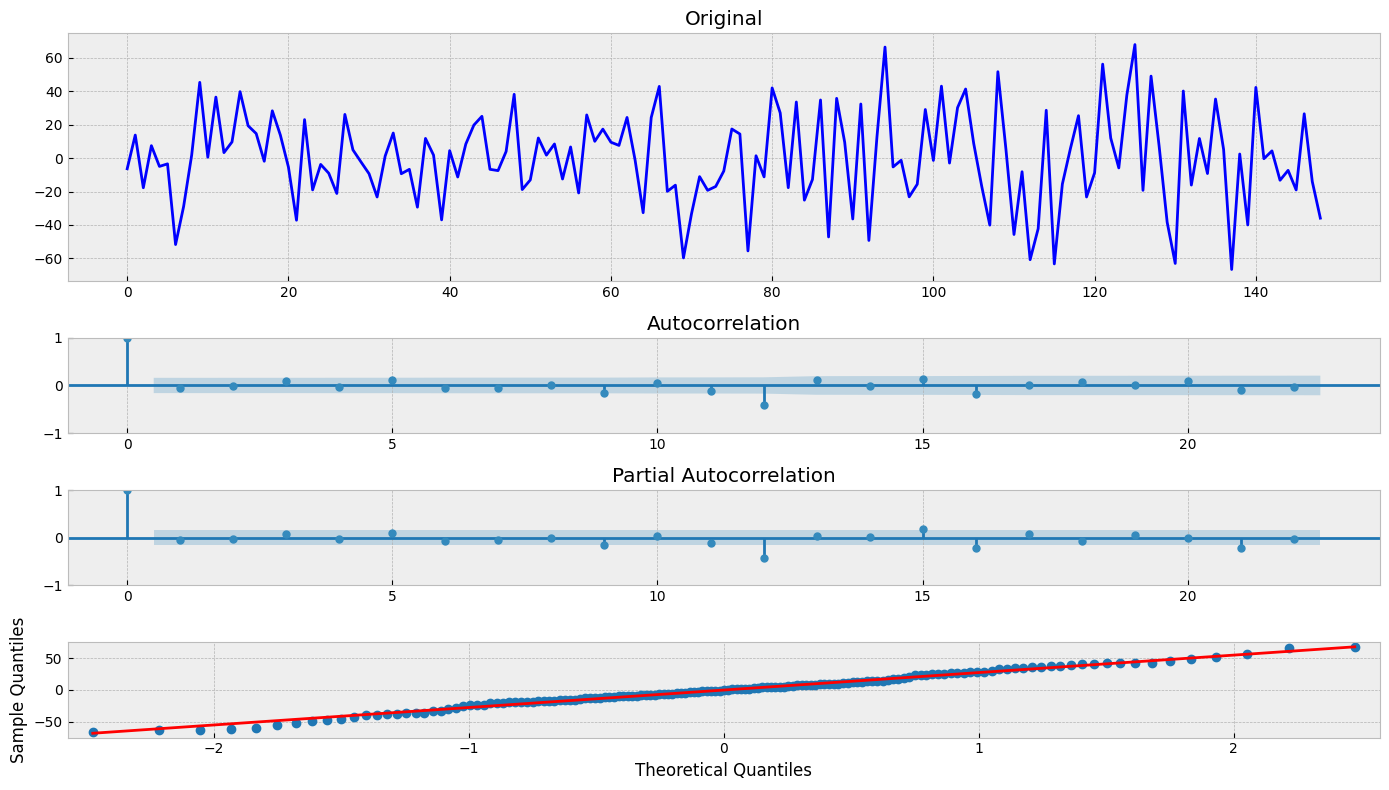

In [ ]:
tsplot(res_model_fit.resid)

In [ ]:
test_stationarity(series)

Test Statistic                  -3.365230
p-value                          0.012203
#Lags Used                      14.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64